## [2021-1] 웹과 텍스트마이닝 개론 중간 프로젝트

### 주제: 의료기기 및 IT 관련 기사 토픽 모델링 시각화

### 휴먼기계바이오공학부 1870021 김수아



### 1. 데이터 수집
- [의학 신문 사이트](http://www.bosa.co.kr/)의 의료기기,IT 카테고리의 한달 간 기사를 스크래핑하였다.
- 기사 제목과 작성 날짜는 BeauifulSoup을 사용하여 수집하였으며 기사 내용은 selenium의 webdriver 모듈을 활용하여 수집하였다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 크롤링
from bs4 import BeautifulSoup
import requests

# 기사 본문 스크래핑을 위한 라이브러리
from selenium import webdriver

import warnings
warnings.filterwarnings('ignore')

In [2]:
title_list = []
date_list = []
content_list = []

# 기사 내용 가져오기 위한 준비 : 크롬 드라이버 세팅 및 웹 로딩 시간 설정
driver = webdriver.Chrome('./chromedriver')
driver.implicitly_wait(3)

def web_scraping(end, start):
    while 1:
        if start > end :
            break

        url ='http://www.bosa.co.kr/news/articleList.html?page={}&total=8158&sc_section_code=S1N4&sc_order_by=E'.format(start)
        
        # 해당 url에 해당하는 페이지를 가져옴
        req = requests.get(url)
        req.encoding = 'utf-8'
        mainPage = BeautifulSoup(req.text, 'html.parser')
        
        # 기사 제목 및 작성 날짜 가져오기
        titles = mainPage.find_all(attrs='list-titles list-pad-5')
        dates = mainPage.find_all(attrs='list-times')

        for title in titles:
            title_list.append(title.text)
        
        for date in dates:
            date_list.append(date.text)
        
        # 기사 내용 가져오기
        driver.get(url)
        for article in [3,4,5,6,7,9,10,11,12,13,15,16,17,18,19,21,22,23,24,25]:
            driver.find_element_by_css_selector('#article-list > tbody > tr > td > table > tbody > tr:nth-child(' + str(article) + ') > td.list-titles.list-pad-5 > a').click()
            content_list.append(driver.find_element_by_css_selector('#articleBody').text)
            driver.get(url)

        start += 1

In [3]:
# 지난 한달간 작성된 기사 스크래핑
web_scraping(5, 1)

In [4]:
print(title_list)

['이루다, 루트로닉과 하이저 공급 계약 해지 배경은?  ', '“S-ICD, 삽입 후 관리도 자신 있어야 한다”  ', '코어라인, AI 폐암 검진 솔루션 도입 열기 후끈  ', '라이프시맨틱스, ‘닥터앤서 2.0’ 사업 돌입  ', '뷰노, AI 간암 병리 연구 ‘ASCO’서 발표  ', '헬스케어 혁신 지속, 핵심 키워드는 교육 훈련 프로그램  ', '메디컬아이피, 200억 규모 투자 유치 완료  ', '진시스템, 코스닥 날개 달고 분자진단 플랫폼 리더 도약  ', '로슈진단, 대용량 전자동 코로나19-독감 동시진단 검사 출시  ', '루트로닉, ‘더마브이’ 미국 FDA 승인 획득  ', '아태 헬스케어 리더 “스마트 기술 활용, 환자 중심 의료 강조”  ', '‘한국형 히든챔피언’ 의료기기 글로벌 강소기업 주목  ', '메디에이지, 차세대 맞춤형 건강 분석 솔루션 ‘뉴트리에이지 젠플러스’ 개발  ', '큐렉소, 연이은 의료로봇 판매 계약 순풍  ', 'GE헬스케어-한국마이크로소프트, 업무 협약  ', '엘앤씨바이오, 흉터 치료용 ‘ZAG16 펩타이드’ 특허 출원  ', '똑닥 모바일 서비스 만족도 조사…5점 만점에 4.5점  ', '스카이랩스, 독일 최대 웨어러블 의료기기 유통사와 계약  ', '멀츠 에스테틱스, 울쎄라 정품 인증 앱 리뉴얼 론칭  ', '이오플로우, 국제표준 정보보호 인증 2종 동시 획득  ', '코로나19, 동남아 헬스케어 디지털 경제 수용 가속화  ', '전남대 김민아 박사과정생 류마티스 관절염 치료 부작용 최소화  ', '의료기기협회, 혁신 의료기술 전향적 비급여 적용 요청  ', 'AITRICS, ‘바이탈케어’ MS 마켓플레이스서 판매 개시  ', '3D 기술, 의료 현장 효용성 인정…활용 확대 주목  ', '루닛, WHO 결핵 검진 가이드라인서 전문의 대체 SW 소개  ', '이오플로우 자회사 네프리아, 인공신장 개발 성큼  ', '인비절라인, APAC 버츄얼 심포지엄 개최  ', '힐링본정형외과는 왜 이지케어텍 ‘엣지앤넥스트

In [5]:
print(content_list[0])

[의학신문·일간보사=오인규 기자] “이번 계약을 발판으로 HIFU 분야에서의 글로벌 경쟁력 확보와 개방적 협력 모델을 창출하겠다”
메디컬 에스테틱 기기를 개발, 생산하는 의료기기 전문기업 이루다(대표 김용한)는 지난 7일 루트로닉과 지난해 10월 체결했던 HIFU(집속형초음파) 에너지 기반의 hyzer me 및 hyzer eye와 Handpiece, Cartridge 등 그 주변장치와 부품에 대한 공급 계약을 해지한다고 공시하며 배경에 관심이 쏠리고 있다.
(왼쪽부터) 이루다 김용한 대표, 루트로닉 황해령 대표가 지난해 협약을 체결하고 있는 모습.
앞서 이루다와 루트로닉은 38억원 규모의 HIFU(집속초음파) 장비 개발, 공급 계약을 체결한바 있으며 당시 계약금액은 2019년 매출액 대비 18.1%로 계약기간은 2021년 10월 25일까지였다.
주요 골자는 양사가 보유하고 있는 조직력·기술력·제품력을 토대로 HIFU 에너지 기반의 메디칼에스테틱기기를 양사의 공동 브랜드인 ‘hyzer’로 출시하고, 상호 간 노하우를 활용해 국내외 마케팅에 적극적으로 협력하는 것은 물론, 향후 HIFU 기반의 신제품 개발 및 연구·임상·유통에 있어서도 보유하고 있는 기술 등을 공유하게 된다는 것.
이를 위해 루트로닉은 개발이 완료된 hyzer 시리즈의 공급과 국가별 인증 획득 등을 이루다와 협력해 나갈 계획이었다.
특히 이번 계약은 동종업계 경쟁 관계임에도 불구하고 기술 및 임상 공유, 공동 사업 추진 등 양 사 간의 협력을 추진한다는 점 때문에 업계 안팎에서 이례적인 행보로 주목 받았지만 결국 본궤도에 이르지 못하고 좌초하게 됐다.
하이저는 이루다의 차별화된 특허기술이 적용된 HIFU(집속초음파) 제품으로 판매 이후에도 소모품 카트리지를 통해 지속적인 매출 확대를 기대할 수 있는 제품으로, 계약해지 후 자체 마케팅을 추진하면 영업이익 측면에서는 보다 유리해 질 것이라는 전망도 나오고 있다.
회사 관계자는 “계약된 기본 모델 외 추가하기로 협의된 확장 기능 및 판매시기에 대한 이

In [6]:
print(date_list)

['2021-05-10 11:28', '2021-05-10 05:50', '2021-05-07 18:05', '2021-05-07 17:26', '2021-05-07 17:26', '2021-05-07 05:50', '2021-05-06 15:41', '2021-05-06 12:01', '2021-05-06 09:49', '2021-05-06 09:25', '2021-05-06 09:24', '2021-05-06 05:50', '2021-05-04 12:28', '2021-05-04 11:54', '2021-05-04 11:14', '2021-05-04 10:27', '2021-05-03 10:51', '2021-05-03 10:41', '2021-05-03 10:41', '2021-05-03 10:41', '2021-05-03 05:50', '2021-04-30 14:19', '2021-04-30 12:04', '2021-04-30 09:45', '2021-04-30 05:50', '2021-04-29 11:36', '2021-04-29 10:35', '2021-04-29 10:21', '2021-04-29 05:50', '2021-04-28 10:44', '2021-04-28 10:36', '2021-04-28 06:28', '2021-04-28 05:51', '2021-04-28 05:50', '2021-04-27 10:04', '2021-04-27 10:04', '2021-04-27 09:58', '2021-04-27 05:50', '2021-04-26 13:23', '2021-04-26 11:06', '2021-04-26 05:50', '2021-04-23 12:00', '2021-04-23 10:40', '2021-04-22 11:22', '2021-04-22 11:22', '2021-04-22 05:50', '2021-04-21 14:03', '2021-04-21 09:30', '2021-04-21 05:50', '2021-04-20 14:57',

### 2. 데이터 전처리
- 정규표현식을 활용하여 불필요한 내용 및 태그를 제거하였다.

In [7]:
# 파이썬에서 정규표현식 활용을 위한 re 모듈 import
import re

In [8]:
# 제목 리스트 속 특집 기사 태그 (예: [2021의료기기 우리 부서가 뛴다]) 제거 
refined_title = []

for title in title_list:
    title = re.sub(r"\[(.+)\]",'', title)
    refined_title.append(title)

print(refined_title)

['이루다, 루트로닉과 하이저 공급 계약 해지 배경은?  ', '“S-ICD, 삽입 후 관리도 자신 있어야 한다”  ', '코어라인, AI 폐암 검진 솔루션 도입 열기 후끈  ', '라이프시맨틱스, ‘닥터앤서 2.0’ 사업 돌입  ', '뷰노, AI 간암 병리 연구 ‘ASCO’서 발표  ', '헬스케어 혁신 지속, 핵심 키워드는 교육 훈련 프로그램  ', '메디컬아이피, 200억 규모 투자 유치 완료  ', '진시스템, 코스닥 날개 달고 분자진단 플랫폼 리더 도약  ', '로슈진단, 대용량 전자동 코로나19-독감 동시진단 검사 출시  ', '루트로닉, ‘더마브이’ 미국 FDA 승인 획득  ', '아태 헬스케어 리더 “스마트 기술 활용, 환자 중심 의료 강조”  ', '‘한국형 히든챔피언’ 의료기기 글로벌 강소기업 주목  ', '메디에이지, 차세대 맞춤형 건강 분석 솔루션 ‘뉴트리에이지 젠플러스’ 개발  ', '큐렉소, 연이은 의료로봇 판매 계약 순풍  ', 'GE헬스케어-한국마이크로소프트, 업무 협약  ', '엘앤씨바이오, 흉터 치료용 ‘ZAG16 펩타이드’ 특허 출원  ', '똑닥 모바일 서비스 만족도 조사…5점 만점에 4.5점  ', '스카이랩스, 독일 최대 웨어러블 의료기기 유통사와 계약  ', '멀츠 에스테틱스, 울쎄라 정품 인증 앱 리뉴얼 론칭  ', '이오플로우, 국제표준 정보보호 인증 2종 동시 획득  ', '코로나19, 동남아 헬스케어 디지털 경제 수용 가속화  ', '전남대 김민아 박사과정생 류마티스 관절염 치료 부작용 최소화  ', '의료기기협회, 혁신 의료기술 전향적 비급여 적용 요청  ', 'AITRICS, ‘바이탈케어’ MS 마켓플레이스서 판매 개시  ', '3D 기술, 의료 현장 효용성 인정…활용 확대 주목  ', '루닛, WHO 결핵 검진 가이드라인서 전문의 대체 SW 소개  ', '이오플로우 자회사 네프리아, 인공신장 개발 성큼  ', '인비절라인, APAC 버츄얼 심포지엄 개최  ', '힐링본정형외과는 왜 이지케어텍 ‘엣지앤넥스트

In [9]:
# 내용 리스트 속 불필요한 내용 제거
refined_content = []

for content in content_list:
    content = re.sub(r"\<(.+)\>",'', content)
    content = re.sub(r"\[(.+)\]",'', content)
    refined_content.append(content)

print(refined_content[0])

 “이번 계약을 발판으로 HIFU 분야에서의 글로벌 경쟁력 확보와 개방적 협력 모델을 창출하겠다”
메디컬 에스테틱 기기를 개발, 생산하는 의료기기 전문기업 이루다(대표 김용한)는 지난 7일 루트로닉과 지난해 10월 체결했던 HIFU(집속형초음파) 에너지 기반의 hyzer me 및 hyzer eye와 Handpiece, Cartridge 등 그 주변장치와 부품에 대한 공급 계약을 해지한다고 공시하며 배경에 관심이 쏠리고 있다.
(왼쪽부터) 이루다 김용한 대표, 루트로닉 황해령 대표가 지난해 협약을 체결하고 있는 모습.
앞서 이루다와 루트로닉은 38억원 규모의 HIFU(집속초음파) 장비 개발, 공급 계약을 체결한바 있으며 당시 계약금액은 2019년 매출액 대비 18.1%로 계약기간은 2021년 10월 25일까지였다.
주요 골자는 양사가 보유하고 있는 조직력·기술력·제품력을 토대로 HIFU 에너지 기반의 메디칼에스테틱기기를 양사의 공동 브랜드인 ‘hyzer’로 출시하고, 상호 간 노하우를 활용해 국내외 마케팅에 적극적으로 협력하는 것은 물론, 향후 HIFU 기반의 신제품 개발 및 연구·임상·유통에 있어서도 보유하고 있는 기술 등을 공유하게 된다는 것.
이를 위해 루트로닉은 개발이 완료된 hyzer 시리즈의 공급과 국가별 인증 획득 등을 이루다와 협력해 나갈 계획이었다.
특히 이번 계약은 동종업계 경쟁 관계임에도 불구하고 기술 및 임상 공유, 공동 사업 추진 등 양 사 간의 협력을 추진한다는 점 때문에 업계 안팎에서 이례적인 행보로 주목 받았지만 결국 본궤도에 이르지 못하고 좌초하게 됐다.
하이저는 이루다의 차별화된 특허기술이 적용된 HIFU(집속초음파) 제품으로 판매 이후에도 소모품 카트리지를 통해 지속적인 매출 확대를 기대할 수 있는 제품으로, 계약해지 후 자체 마케팅을 추진하면 영업이익 측면에서는 보다 유리해 질 것이라는 전망도 나오고 있다.
회사 관계자는 “계약된 기본 모델 외 추가하기로 협의된 확장 기능 및 판매시기에 대한 이견으로 양사 사업 계획을 조정하기

In [10]:
# 수집한 데이터를 pandas 데이터프레임 형식으로 저장
medical_news = pd.DataFrame({'title': refined_title,
                   'content': refined_content,
                  'date': date_list})

print(medical_news)

                                title  \
0      이루다, 루트로닉과 하이저 공급 계약 해지 배경은?     
1       “S-ICD, 삽입 후 관리도 자신 있어야 한다”     
2       코어라인, AI 폐암 검진 솔루션 도입 열기 후끈     
3         라이프시맨틱스, ‘닥터앤서 2.0’ 사업 돌입     
4        뷰노, AI 간암 병리 연구 ‘ASCO’서 발표     
..                                ...   
95    7년 만에 돌아온 중국 ‘조례 739호’ 5가지 요점     
96    혈액 내 사이토카인 제거, 혈액관류장치 사이토솝 출시     
97        메드트로닉, 흉부심장혈관외과학회와 MOU 체결     
98   메디컬아이피, 환자맞춤형 뇌종양 3D프린팅 유용성 인정     
99  ‘中 의료기기’ 인증 장벽 낮추고, 위반 시 처벌은 강화     

                                              content              date  
0    “이번 계약을 발판으로 HIFU 분야에서의 글로벌 경쟁력 확보와 개방적 협력 모델...  2021-05-10 11:28  
1   \n국내 S-ICD Proctor 릴레이 인터뷰 ④양산부산대병원 최진희 교수\n보스...  2021-05-10 05:50  
2    코어라인소프트(대표 김진국, 최정필)는 자사 AI 폐암 검진 솔루션 ‘AVIEWL...  2021-05-07 18:05  
3    디지털 헬스케어 전문기업 라이프시맨틱스는 7일 진단정보, 의료영상, 유전체정보 등...  2021-05-07 17:26  
4    의료 AI 솔루션 공급 기업 뷰노(대표 김현준)는 오는 6월 세계 3대 암 학회 ...  2021-05-07 17:26  
..                                                ...          

In [11]:
medical_news.keys()

Index(['title', 'content', 'date'], dtype='object')

In [12]:
medical_news.head()

,title,content,date
0,"이루다, 루트로닉과 하이저 공급 계약 해지 배경은?",“이번 계약을 발판으로 HIFU 분야에서의 글로벌 경쟁력 확보와 개방적 협력 모델...,2021-05-10 11:28
1,"“S-ICD, 삽입 후 관리도 자신 있어야 한다”",\n국내 S-ICD Proctor 릴레이 인터뷰 ④양산부산대병원 최진희 교수\n보스...,2021-05-10 05:50
2,"코어라인, AI 폐암 검진 솔루션 도입 열기 후끈","코어라인소프트(대표 김진국, 최정필)는 자사 AI 폐암 검진 솔루션 ‘AVIEWL...",2021-05-07 18:05
3,"라이프시맨틱스, ‘닥터앤서 2.0’ 사업 돌입","디지털 헬스케어 전문기업 라이프시맨틱스는 7일 진단정보, 의료영상, 유전체정보 등...",2021-05-07 17:26
4,"뷰노, AI 간암 병리 연구 ‘ASCO’서 발표",의료 AI 솔루션 공급 기업 뷰노(대표 김현준)는 오는 6월 세계 3대 암 학회 ...,2021-05-07 17:26


In [13]:
medical_news.tail()

,title,content,date
95,7년 만에 돌아온 중국 ‘조례 739호’ 5가지 요점,‘세계의 시장’이라는 별명을 가진 중국의 의료기기 분야는 약 70%가 수입에 의존하...,2021-04-01 05:50
96,"혈액 내 사이토카인 제거, 혈액관류장치 사이토솝 출시",전 세계적으로 패혈증은 중환자실의 주요 사망 원인으로 대한중환자의학회 자료에 의하...,2021-03-31 10:53
97,"메드트로닉, 흉부심장혈관외과학회와 MOU 체결",메드트로닉코리아는 대한흉부심장혈관외과학회(이하 학회)와 국내외 의료인의 술기 및 ...,2021-03-31 10:09
98,"메디컬아이피, 환자맞춤형 뇌종양 3D프린팅 유용성 인정",AI 플랫폼 기반 3D프린팅 전문기업 메디컬아이피(대표 박상준)는 신경외과 수술에...,2021-03-31 10:09
99,"‘中 의료기기’ 인증 장벽 낮추고, 위반 시 처벌은 강화",‘세계의 시장’이라는 별명을 가진 중국의 의료기기 분야는 약 70%가 수입에 의존하...,2021-03-31 05:50


### 3. 데이터 분석
- 비음수 행렬 분해(NMF)를 활용한 의료기기,IT 뉴스를 5개의 토픽으로 모델링하였다.

In [30]:
## Text 데이터 처리
from konlpy.tag import Kkma

# sklearn 패키지: 행렬 생성
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# nmf 함수
from sklearn.decomposition import NMF 

In [31]:
kkma = Kkma()

def tokenizer(text):
    nouns = kkma.nouns(text)
    return [noun for noun in nouns if len(noun) > 1]

In [32]:
# 문서 빈도 상한선: 90% 넘는 문서에 출현하는 단어 배제
# 문서 빈도 하한선: 3개 이상의 문서에 출현할 것
# 전체 문서에서 출현 빈도가 높은 1000개 단어 고려

vectorizer = TfidfVectorizer(tokenizer=tokenizer, max_df=0.90, min_df=3, max_features=1000)

In [33]:
# 'content' 데이터의 문서-단어 행렬 생성 (TF-idf)
tfidf = vectorizer.fit_transform(medical_news['content'])

In [39]:
# NMF 적용 : 문서 토픽 개수는 5개로 지정
nmf = NMF(n_components=5, random_state=1)

# 문서-토픽 행렬 생성
H = nmf.fit_transform(tfidf)    

# 토픽-단어 행렬 생성
W = nmf.components_           

In [40]:
# 각 문서가 5개 토픽 그룹으로 나누어짐을 확인
H.shape  

(100, 5)

In [41]:
# 5개 토픽과 단어의 연관 관계를 확인
W.shape

(5, 1000)

### 4. 분석결과 시각화
- wordcloud를 통해 토픽 모델링한 결과를 시각화하였다.

In [42]:
# 시각화를 위한 모듈 import
from wordcloud import WordCloud

주제가 (0)인 문서 개수: 21
주제가 (1)인 문서 개수: 14
주제가 (2)인 문서 개수: 10
주제가 (3)인 문서 개수: 27
주제가 (4)인 문서 개수: 28


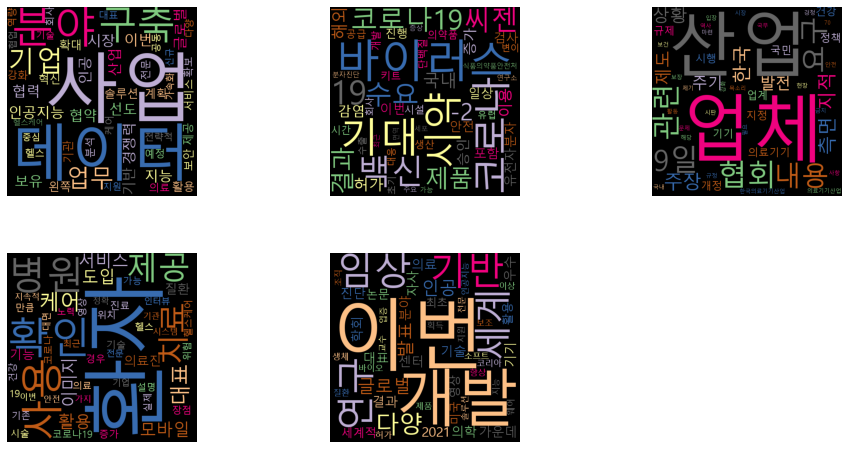

In [44]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', colormap = 'Accent_r', width=500, height=500,
                      max_words=50, random_state=1)


# 뉴스마다 토픽 부여: 'topic' 열에 가장 큰 값(주제에 해당하는 값) 저장
medical_news['topic'] = H.argmax(axis=1)

plt.figure(figsize=(16,8))

for idx in range(5):    
    topic_idx = medical_news.index[medical_news['topic'] == idx]
    print('주제가 ({0})인 문서 개수: {1}'.format(idx, len(topic_idx)))
    word_score = tfidf.toarray()[topic_idx].sum(axis=0)
    d = dict(zip(vectorizer.get_feature_names(), word_score))
    
    wordcloud.generate_from_frequencies(d)
    
    plt.subplot(2,3,idx+1)
    plt.imshow(wordcloud)
    plt.axis("off")

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()